# Ridge, Lasso, and Elastic Net Regressions
## Michael Rawat

The codes in this notebook closely follows the original notebook prepared by previous instructors of BIA 6303-Predictive Models: Myles Gartland, Harlan Hays and Xuan Pham. 

In [1]:
#load packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os as os
from sklearn.metrics import mean_squared_error
%matplotlib inline 
import sys

In [2]:
print("The Python version is %s.%s.%s" % sys.version_info[:3])

The Python version is 3.9.7


In [3]:
%pwd

'C:\\Users\\micha\\OneDrive\\Desktop\\Rockhurst University\\Classes\\BIA 6303 - Predictive Models\\Module2\\code'

In [4]:
cd C:\\Users\\micha\\OneDrive\\Desktop\\Rockhurst University\\Classes\\BIA 6303 - Predictive Models\\Module2\\data

C:\Users\micha\OneDrive\Desktop\Rockhurst University\Classes\BIA 6303 - Predictive Models\Module2\data


In [5]:
#import data
df = pd.read_csv("boston.csv", sep=",", header=1, engine='python')
df.shape

(506, 14)

Description, which was previously available at: https://archive.ics.uci.edu/ml/datasets/Housing  

Attributes:
1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per 10,000 dollars
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT    percentage lower status of the population
14. MEDV     Median value of owner-occupied homes in thousand of dollars

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Our target variable is MEDV (median value in thousand of dollars). 

In [7]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


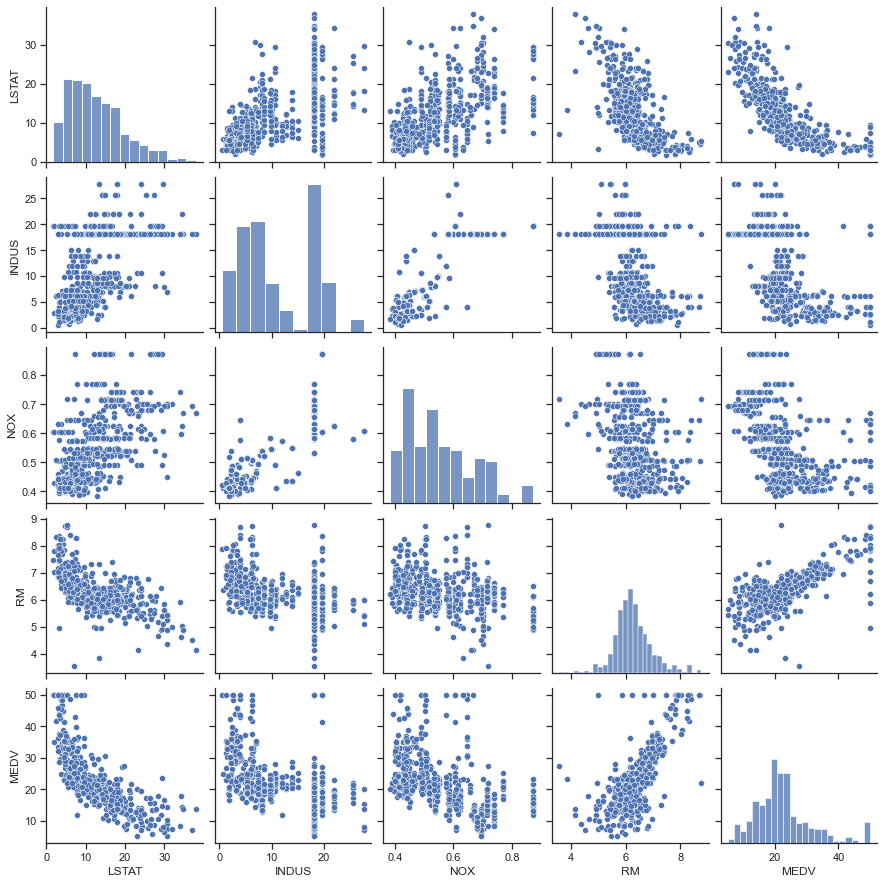

In [9]:
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
import seaborn as sns; sns.set(style="ticks", color_codes=True)
#iris = sns.load_dataset("iris")
g = sns.pairplot(df[cols])

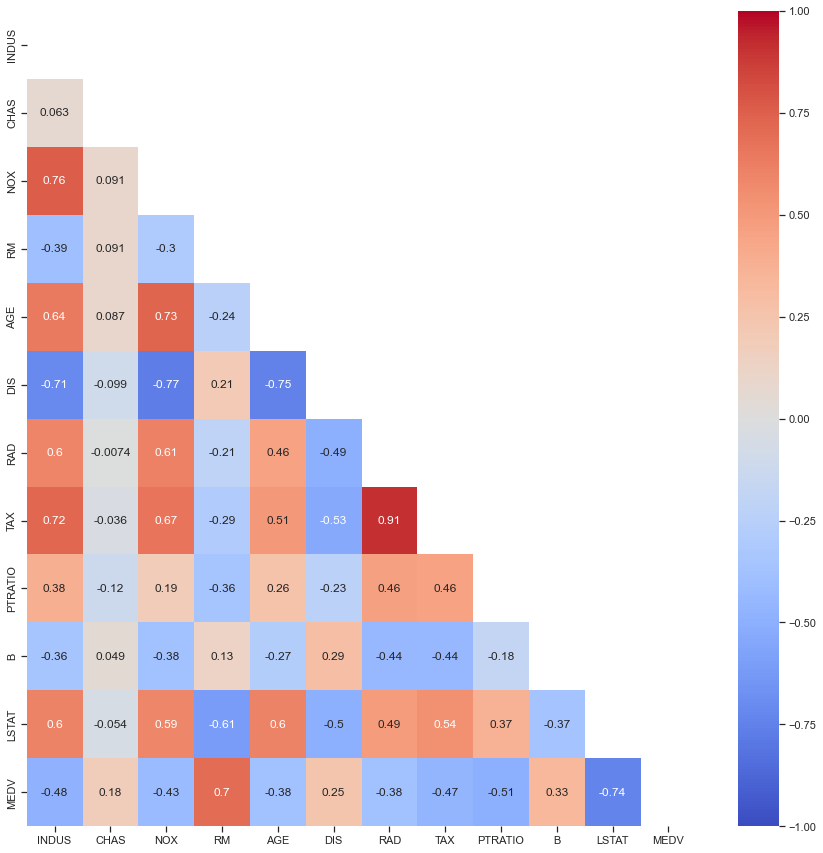

In [10]:
corr_matrix = df.iloc[:,2:].corr()
corr_matrix

#code chunk is attributed as follows:
#Shaw, Chris (2019). How to customize seaborn correlation heat map. Medium. 
#Retrieved from https://medium.com/@chrisshaw982/seaborn-correlation-heatmaps-customized-10246f4f7f4b.

import seaborn as sns

plt.figure(figsize=(15,15)) #need to adjust size as needed.
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_matrix,
           vmin=-1,
           vmax=1,
           cmap='coolwarm',
           annot=True,
           mask=mask)
plt.show()

It looks like MEDV is highly positively correlated with RM (number of rooms per dwelling) and highly negatively correlated with LSAT (percentage of population with lower economic status). MEDV is also negatively correlated with INDUS (proportion of no-retail business), NOX (level of nitric oxides), TAX (property taxes per 10,000 dollars), and PRRATIO (pupil-teacher ratio). 

In [11]:
# designate target variable name & move it to the front of the dataframe
targetName = 'MEDV'
#print(targetName)
targetSeries = df[targetName] #notice one column is considered a series in pandas
#print(targetSeries)
#remove target from current location and insert in column number 0
del df[targetName]
df.insert(0, targetName, targetSeries)
#reprint dataframe and see target is in position 0
df.head(5)

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


## Linear Regression: Ordinary Least Squares

In [12]:
# split dataset into testing and training
# column location 1 to end of dataframe are the features.
# column location 0 is the target
from sklearn.model_selection  import train_test_split
features_train, features_test, target_train, target_test = train_test_split(
    df.iloc[:,1:].values, df.iloc[:,0].values, test_size=0.20, random_state=0)

print(features_train.shape)
print(target_train.shape)
print(features_test.shape)
print(target_test.shape)

(404, 13)
(404,)
(102, 13)
(102,)


In [13]:
from sklearn.linear_model import LinearRegression

#Step 1: Build a Model
clf_lr = LinearRegression(normalize=True)
clf_lr

LinearRegression(normalize=True)

In [14]:
#Step 2: Train the Model
clf_lr.fit(features_train, target_train)

LinearRegression(normalize=True)

In [15]:
#Step 3: Validate the Model
# make predictions
predicted = clf_lr.predict(features_test)

In [16]:
# summarize the fit of the model
print("Coef", clf_lr.intercept_, clf_lr.coef_)

LR_MSE=mean_squared_error(target_test, predicted)
print("MSE", LR_MSE)

Coef 38.138692713392985 [-1.18410318e-01  4.47550643e-02  5.85674689e-03  2.34230117e+00
 -1.61634024e+01  3.70135143e+00 -3.04553661e-03 -1.38664542e+00
  2.43784171e-01 -1.09856157e-02 -1.04699133e+00  8.22014729e-03
 -4.93642452e-01]
MSE 33.450708967691135


In [17]:
pd.DataFrame(np.transpose(clf_lr.coef_))

,0
0,-0.118410
1,0.044755
2,0.005857
3,2.342301
4,-16.163402
5,3.701351
6,-0.003046
7,-1.386645
8,0.243784
9,-0.010986


Here's another view of the regression coefficients plotted out. Notice that feature 4 really stands out from the rest!

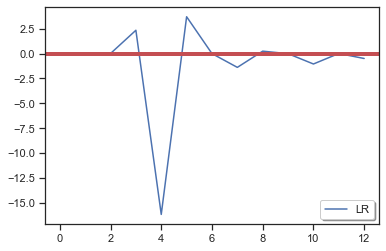

In [18]:
fig, ax = plt.subplots()
plt.plot(clf_lr.coef_, label='LR')
plt.axhline(linewidth=4, color='r') # for reference
legend = ax.legend(loc='lower right', shadow=True)
plt.show()

## Ridge Regression

In [19]:
# Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Step 1: Build
clf_rg = make_pipeline(StandardScaler(), Ridge(alpha=0.01)) #alpha is lambda (the tuning parameter)!
print(clf_rg) #use this to see all the steps in your pipeline
# Step 2: Train 
clf_rg.fit(features_train, target_train)

# Step 3: Validate
predicted_rg= clf_rg.predict(features_test)

# summarize the fit of the model
# Since I use a pipeline, I have to call back up the 'ridge' part of the pipeline to get access to the fitted model
print("Coef", clf_rg['ridge'].intercept_, clf_rg['ridge'].coef_)
# A student commented that it is not possible to print the line above without adding in the named_steps method. 
#You may want to try the following line if the one above does not work.
#print("Coef", clf_rg.named_steps['ridge'].intercept_, clf_rg.named_steps['ridge'].coef_)

Ridge_MSE=mean_squared_error(target_test, predicted_rg)
print("MSE", Ridge_MSE) #notice the slightly higher MSE compared to OLS 

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=0.01))])
Coef 22.611881188118836 [-0.96150618  1.05639381  0.04062792  0.59493051 -1.8593679   2.56822453
 -0.08557352 -2.88112674  2.1080482  -1.87392446 -2.29501515  0.72792405
 -3.5984825 ]
MSE 33.45159595516164


In [20]:
pd.DataFrame(np.transpose(clf_rg['ridge'].coef_))

,0
0,-0.961506
1,1.056394
2,0.040628
3,0.594931
4,-1.859368
5,2.568225
6,-0.085574
7,-2.881127
8,2.108048
9,-1.873924


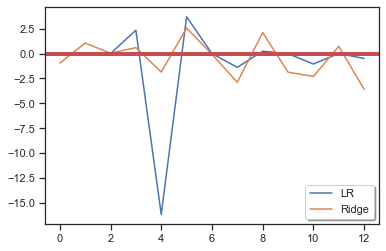

In [21]:
fig, ax = plt.subplots()
plt.plot(clf_lr.coef_, label='LR')
plt.plot(clf_rg['ridge'].coef_, label='Ridge')
plt.axhline(linewidth=4, color='r') # for reference
legend = ax.legend(loc='lower right', shadow=True)
plt.show() 

Let's do a grid search to see if we can find a better tuning parameter to use than 20.

In [22]:
# use a full grid over several parameters and cross validate 5 times
from sklearn.model_selection import GridSearchCV
#param_grid = {"alpha": [2,10, 20, 50, 100, 500]}
#param_grid={"alpha": np.arange(1,11,1).tolist()} #this does a range 1 through 10 changes by a factor of 1. 
#param_grid={"alpha": np.arange(0.01,1,0.05).tolist()} #this does a range .01 through 1 changes by a factor of .05
param_grid={"alpha": [.01,.05,1]}

# run grid search
grid_search = GridSearchCV(clf_rg['ridge'], param_grid=param_grid,n_jobs=-1,cv=5)
#Look at the documentation for GridSearchCV
#n_jobs = how many jobs to run in parallel. Default is 1. -1 means run all jobs at the same time.
grid_search.fit(features_train, target_train)
print("Grid Scores", grid_search.cv_results_)
print("Best", grid_search.best_params_)

# Putting results into a readable dataframe
pd.concat([pd.DataFrame(grid_search.cv_results_["rank_test_score"], columns=["Rank"]),
           pd.DataFrame(grid_search.cv_results_["params"]),
           pd.DataFrame(grid_search.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

Grid Scores {'mean_fit_time': array([0.00972924, 0.00810547, 0.00816679]), 'std_fit_time': array([0.00138014, 0.00074512, 0.00099206]), 'mean_score_time': array([0.0006186 , 0.00062995, 0.00037527]), 'std_score_time': array([0.00019243, 0.00018752, 0.00019248]), 'param_alpha': masked_array(data=[0.01, 0.05, 1],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'alpha': 0.01}, {'alpha': 0.05}, {'alpha': 1}], 'split0_test_score': array([0.77438818, 0.77468264, 0.77665038]), 'split1_test_score': array([0.69712081, 0.69695325, 0.69240102]), 'split2_test_score': array([0.76846134, 0.76816882, 0.76333803]), 'split3_test_score': array([0.68783347, 0.68751349, 0.68242765]), 'split4_test_score': array([0.81559944, 0.81559093, 0.81246031]), 'mean_test_score': array([0.74868065, 0.74858183, 0.74545548]), 'std_test_score': array([0.04876694, 0.04888757, 0.05013948]), 'rank_test_score': array([1, 2, 3])}
Best {'alpha': 0.01}


,Rank,alpha,Accuracy
0,1,0.01,0.748681
1,2,0.05,0.748582
2,3,1.00,0.745455


## LASSO Regression

In [23]:
# Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Step 1: Build
clf_ls = make_pipeline(StandardScaler(), Lasso(alpha=2)) #alpha is lambda (the tuning parameter)!
print(clf_ls) #use this to see all the steps in your pipeline
# Step 2: Train 
clf_ls.fit(features_train, target_train)

# Step 3: Validate
predicted_ls= clf_ls.predict(features_test)

# summarize the fit of the model
# Since I use a pipeline, I have to call back up the 'ridge' part of the pipeline to get access to the fitted model
print("Coef", clf_ls['lasso'].intercept_, clf_ls['lasso'].coef_)
Lasso_MSE=mean_squared_error(target_test, predicted_ls)
print("MSE", Lasso_MSE) #notice the slightly higher MSE compared to OLS 

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=2))])
Coef 22.611881188118826 [-0.          0.         -0.          0.         -0.          2.02893504
 -0.          0.         -0.         -0.         -1.1973605   0.
 -3.26178639]
MSE 41.36227102668867


In [24]:
pd.DataFrame(np.transpose(clf_ls['lasso'].coef_))

,0
0,-0.000000
1,0.000000
2,-0.000000
3,0.000000
4,-0.000000
5,2.028935
6,-0.000000
7,0.000000
8,-0.000000
9,-0.000000


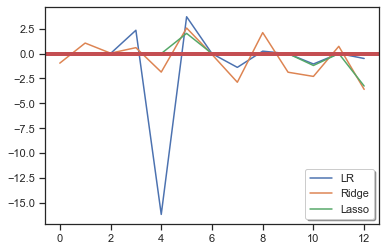

In [25]:
fig, ax = plt.subplots()
plt.plot(clf_lr.coef_, label='LR')
plt.plot(clf_rg['ridge'].coef_, label='Ridge')
plt.plot(clf_ls['lasso'].coef_, label='Lasso')
plt.axhline(linewidth=4, color='r') # for reference
legend = ax.legend(loc='lower right', shadow=True)
plt.show()

You can use the same grid search approach as ridge regression to tune the alpha.

## Elastic Net

In [26]:
# ElasticNet Regression
from sklearn.linear_model import ElasticNet

# Step 1: Build
clf_en = make_pipeline(StandardScaler(), ElasticNet(alpha=2)) #alpha is lambda (the tuning parameter)!
print(clf_en) #use this to see all the steps in your pipeline
# Step 2: Train 
clf_en.fit(features_train, target_train)

# Step 3: Validate
predicted_en= clf_en.predict(features_test)

# summarize the fit of the model
# Since I use a pipeline, I have to call back up the 'elasticnet' part of the pipeline to get access to the fitted model
print("Coef", clf_en['elasticnet'].intercept_, clf_en['elasticnet'].coef_)
Elastic_MSE=mean_squared_error(target_test, predicted_en)
print("MSE", Elastic_MSE) #notice the slightly higher MSE compared to OLS

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('elasticnet', ElasticNet(alpha=2))])
Coef 22.611881188118826 [-0.31614135  0.18381971 -0.39929273  0.09278497 -0.22590118  1.7241472
 -0.03937156  0.         -0.0349248  -0.44820903 -1.12064792  0.28081958
 -1.73854018]
MSE 46.895318903430436


In [27]:
pd.DataFrame(np.transpose(clf_en['elasticnet'].coef_))

,0
0,-0.316141
1,0.183820
2,-0.399293
3,0.092785
4,-0.225901
5,1.724147
6,-0.039372
7,0.000000
8,-0.034925
9,-0.448209


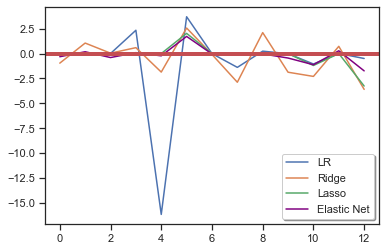

In [28]:
fig, ax = plt.subplots()
plt.plot(clf_lr.coef_, label='LR')
plt.plot(clf_rg['ridge'].coef_, label='Ridge')
plt.plot(clf_ls['lasso'].coef_, label='Lasso')
plt.plot(clf_en['elasticnet'].coef_, label='Elastic Net', color='purple')
plt.axhline(linewidth=4, color='r') # for reference
legend = ax.legend(loc='lower right', shadow=True)
plt.show()

In [29]:
# Putting results into a dataframe for comparison
pd.concat([pd.DataFrame(clf_lr.coef_, columns=["Logistic Regression"]),
           pd.DataFrame(clf_rg['ridge'].coef_, columns=["Ridge"]),
           pd.DataFrame(clf_ls['lasso'].coef_, columns=["Lasso"]),
           pd.DataFrame(clf_en['elasticnet'].coef_, columns=["Elastic Net"])],axis=1)

,Logistic Regression,Ridge,Lasso,Elastic Net
0,-0.118410,-0.961506,-0.000000,-0.316141
1,0.044755,1.056394,0.000000,0.183820
2,0.005857,0.040628,-0.000000,-0.399293
3,2.342301,0.594931,0.000000,0.092785
4,-16.163402,-1.859368,-0.000000,-0.225901
5,3.701351,2.568225,2.028935,1.724147
6,-0.003046,-0.085574,-0.000000,-0.039372
7,-1.386645,-2.881127,0.000000,0.000000
8,0.243784,2.108048,-0.000000,-0.034925
9,-0.010986,-1.873924,-0.000000,-0.448209


In [30]:
comparison = {'Logistic Regression':  [LR_MSE],
              'Ridge': [Ridge_MSE],
              'Lasso': [Lasso_MSE],
              'Elastic Net': [Elastic_MSE],
              }
comparison_df = pd.DataFrame(comparison)
comparison_df

,Logistic Regression,Ridge,Lasso,Elastic Net
0,33.450709,33.451596,41.362271,46.895319
